#Step 1: Import necessary libraries
###The implementation requires to import numpy, sklearn, FastICA and matplotlib.



In [2]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt


#Step 2: Generate Random Data and Mix the Signals
#In the following code snippet,

Random seed is set to generate random numbers.

Samples and Time parameters are defined.

Synthetic signals are generated and then combined to single matrix “S”.
Noise is added to each element of the matrix.

Matrix “A” is defined with coefficients the represent how the original signals are combined to form observed signals.

The observed signals are obtained by multiplying the matrix “S” by the transpose of the mixing matrix “A”.


In [3]:
# Generate synthetic mixed signals
np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

#np.linspace(0, 8, samples) generates
#samples number of evenly spaced values between 0 and 8. This array will represent the time axis for the signals.


signal_1 = np.sin(2 * time)
signal_2 = np.sign(np.sin(3 * time))
signal_3 = np.random.laplace(size= samples)




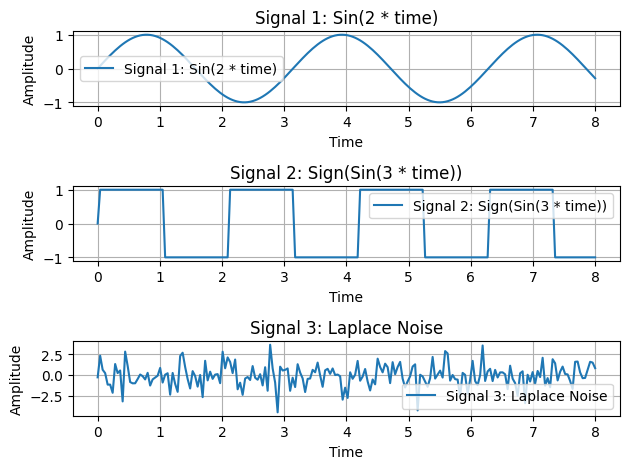

In [4]:
# Plotting signal_1
plt.subplot(3, 1, 1)
plt.plot(time, signal_1, label='Signal 1: Sin(2 * time)')
plt.title('Signal 1: Sin(2 * time)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plotting signal_2
plt.subplot(3, 1, 2)
plt.plot(time, signal_2, label='Signal 2: Sign(Sin(3 * time))')
plt.title('Signal 2: Sign(Sin(3 * time))')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plotting signal_3
plt.subplot(3, 1, 3)
plt.plot(time, signal_3, label='Signal 3: Laplace Noise')
plt.title('Signal 3: Laplace Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
S = np.c_[signal_1, signal_2, signal_3] #np.c_ is used to concatenate via column
S += 0.2 * np.random.normal(size=S.shape)  # Add noise by generating a 2D array of Gaussian noise with the same shape as S

# Mix the signals
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = S.dot(A.T)  # Observed mixed signals

#Step 3: Apply ICA to unmix the signals
#In the following code snippet,



*   An instance of FastICA class is created and number of independent components are set to 3.

*   Fast ICA algorithm is applied to the observed mixed signals ‘X’. This fits the model to the data and transforms the data to obtain the estimated independent sources (S_).





In [ ]:
ica = FastICA(n_components=3) #decompose the mixed signals into 3 independent components
S_ = ica.fit_transform(X)  # Estimated sources


# Step 4: Visualize the signals


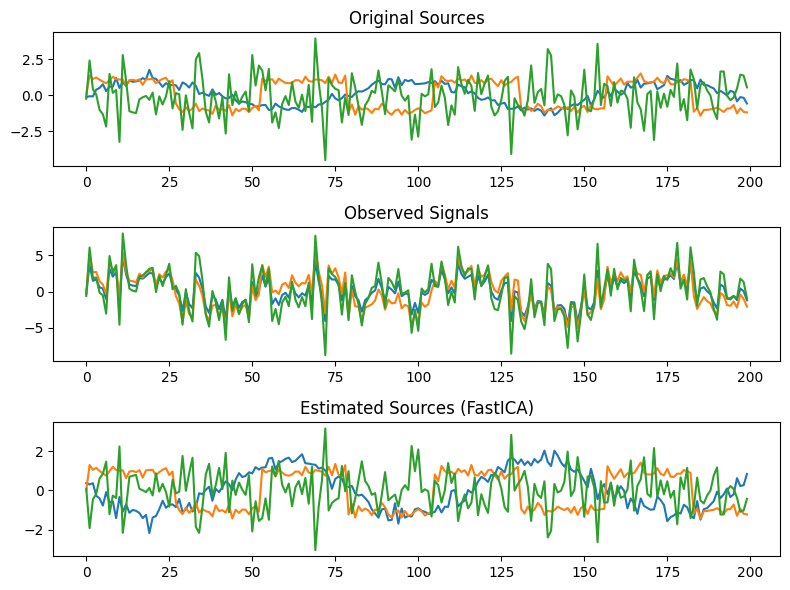

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()
